<a href="https://colab.research.google.com/github/fasthill/AI_advaned_ksa/blob/main/tree/main/deeplearning/notebooks/chap_18_rnn_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from tensorflow.keras.datasets import reuters, imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Embedding, LSTM, SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

2121728/2110848 [==============================] - 0s 0us/step


In [12]:
category = np.max(Y_train) + 1

In [13]:
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [16]:
x_train_seq = pad_sequences(X_train, maxlen=100)
x_test_seq = pad_sequences(X_test, maxlen=100)

In [43]:
model = Sequential()
model.add(Embedding(1000, 50, input_length=100))
model.add(SimpleRNN(46, dropout=0.3))
model.add(Dense(46, activation='softmax'))

In [42]:
early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)
checkout_cb = ModelCheckpoint('best_model.h5', save_best_only=True)

In [44]:
adam = Adam(learning_rate=0.0001)

In [45]:
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [46]:
history = model.fit(x_train_seq, Y_train,
                    epochs=100, batch_size=300,
                    validation_split=0.2,
                    callbacks=[checkout_cb, early_stopping_cb],
                    verbose=1)

Epoch 1/100
24/24 [==============================] - 4s 117ms/step - loss: 3.8021 - accuracy: 0.0341 - val_loss: 3.7651 - val_accuracy: 0.0523
Epoch 2/100
24/24 [==============================] - 2s 93ms/step - loss: 3.7196 - accuracy: 0.1029 - val_loss: 3.6585 - val_accuracy: 0.1814
Epoch 3/100
24/24 [==============================] - 2s 93ms/step - loss: 3.5750 - accuracy: 0.2327 - val_loss: 3.4672 - val_accuracy: 0.2315
Epoch 4/100
24/24 [==============================] - 2s 95ms/step - loss: 3.3734 - accuracy: 0.2502 - val_loss: 3.2549 - val_accuracy: 0.2582
Epoch 5/100
24/24 [==============================] - 2s 95ms/step - loss: 3.1769 - accuracy: 0.3042 - val_loss: 3.0735 - val_accuracy: 0.3066
Epoch 6/100
24/24 [==============================] - 2s 95ms/step - loss: 3.0133 - accuracy: 0.3692 - val_loss: 2.9229 - val_accuracy: 0.4380
Epoch 7/100
24/24 [==============================] - 2s 92ms/step - loss: 2.8785 - accuracy: 0.4205 - val_loss: 2.8023 - val_accuracy: 0.4558
Epoch

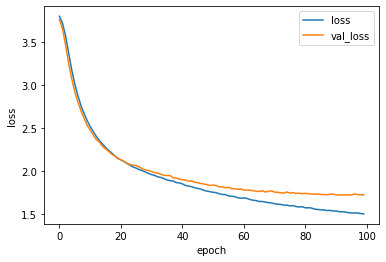

In [47]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [49]:
print('\n Test Accuracy: %.4f' %(model.evaluate(x_test_seq, Y_test)[1]))

71/71 [==============================] - 1s 7ms/step - loss: 1.7846 - accuracy: 0.5579

 Test Accuracy: 0.5579


In [50]:
model2 = Sequential()
model2.add(Embedding(1000, 50, input_length=100))
model2.add(LSTM(46, dropout=0.3))
model2.add(Dense(46, activation='softmax'))

In [51]:
model2.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [52]:
history = model2.fit(x_train_seq, Y_train,
                    epochs=100, batch_size=300,
                    validation_split=0.2,
                    callbacks=[checkout_cb, early_stopping_cb],
                    verbose=1)

Epoch 1/100
24/24 [==============================] - 8s 254ms/step - loss: 3.7552 - accuracy: 0.3008 - val_loss: 3.5025 - val_accuracy: 0.3450
Epoch 2/100
24/24 [==============================] - 6s 242ms/step - loss: 2.9448 - accuracy: 0.3534 - val_loss: 2.6494 - val_accuracy: 0.3450
Epoch 3/100
24/24 [==============================] - 6s 242ms/step - loss: 2.5447 - accuracy: 0.3534 - val_loss: 2.4862 - val_accuracy: 0.3450
Epoch 4/100
24/24 [==============================] - 5s 230ms/step - loss: 2.4578 - accuracy: 0.3534 - val_loss: 2.4428 - val_accuracy: 0.3450
Epoch 5/100
24/24 [==============================] - 6s 238ms/step - loss: 2.4314 - accuracy: 0.3534 - val_loss: 2.4259 - val_accuracy: 0.3450
Epoch 6/100
24/24 [==============================] - 5s 228ms/step - loss: 2.4195 - accuracy: 0.3534 - val_loss: 2.4166 - val_accuracy: 0.3450
Epoch 7/100
24/24 [==============================] - 5s 229ms/step - loss: 2.4117 - accuracy: 0.3534 - val_loss: 2.4090 - val_accuracy: 0.3450

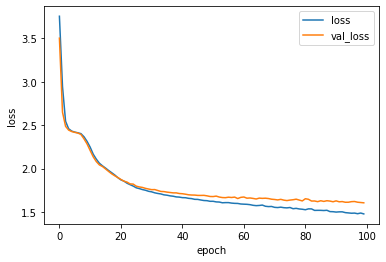

In [53]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [55]:
print('\n Test Accuracy: %.4f' %(model.evaluate(x_test_seq, Y_test)[1]))

71/71 [==============================] - 1s 8ms/step - loss: 1.7846 - accuracy: 0.5579

 Test Accuracy: 0.5579


In [ ]:
X_train = sequence.pad_sequences(X_input_train, maxlen=100)
X_test = sequence.pad_sequences(X_input_test, maxlen=100)

In [ ]:
Y_train = to_categorical(Y_input_train)
Y_test = to_categorical(Y_input_test)

In [ ]:
model = Sequential()
model.add(Embedding(1000,100)) # 1000: 불러온 단어의 총 개수, 100: 기사당 단어 수
model.add(LSTM(100, activation='tanh')) # 100: 기사당 단어 수, 기타 옵션. 활성화함수는 비선형함수인 tanh를 사용함.
model.add(Dense(46, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, batch_size=100, epochs=30, validation_split=0.3)

Epoch 1/30
63/63 [==============================] - 6s 83ms/step - loss: 2.7005 - accuracy: 0.3405 - val_loss: 2.3798 - val_accuracy: 0.3532
Epoch 2/30
63/63 [==============================] - 5s 77ms/step - loss: 2.2812 - accuracy: 0.3929 - val_loss: 2.0176 - val_accuracy: 0.4857
Epoch 3/30
63/63 [==============================] - 5s 76ms/step - loss: 1.9406 - accuracy: 0.4990 - val_loss: 1.7827 - val_accuracy: 0.5247
Epoch 4/30
63/63 [==============================] - 5s 76ms/step - loss: 1.8227 - accuracy: 0.5278 - val_loss: 1.7540 - val_accuracy: 0.5570
Epoch 5/30
63/63 [==============================] - 5s 77ms/step - loss: 1.7270 - accuracy: 0.5478 - val_loss: 1.7278 - val_accuracy: 0.5417
Epoch 6/30
63/63 [==============================] - 5s 75ms/step - loss: 1.6905 - accuracy: 0.5591 - val_loss: 1.6841 - val_accuracy: 0.5681
Epoch 7/30
63/63 [==============================] - 5s 78ms/step - loss: 2.0873 - accuracy: 0.4019 - val_loss: 1.9412 - val_accuracy: 0.3959
Epoch 8/30
63

In [ ]:
print('\n Test Accuracy: %.4f' %(model.evaluate(X_test, Y_test)[1]))

71/71 [==============================] - 1s 11ms/step - loss: 1.3940 - accuracy: 0.6728

 Test Accuracy: 0.6728


In [ ]:
v_loss = history.history['val_loss']
y_loss = history.history['loss']

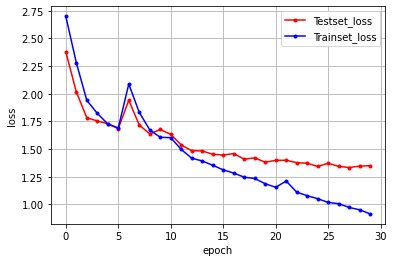

In [ ]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, v_loss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### imdb 분석

In [ ]:
(X_input_train, Y_train), (X_input_test, Y_test) = reuters.load_data(num_words=5000)

In [ ]:
X_train = sequence.pad_sequences(X_input_train, maxlen=100)
X_test = sequence.pad_sequences(X_input_test, maxlen=100)

In [ ]:
model = Sequential()
model.add(Embedding(5000,100)) 
model.add(Dropout(0.5))
model.add(Conv1D(64,5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55, activation='tanh')) # 활성화함수는 비선형함수인 tanh를 사용함.
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout_3 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d_3 (Conv1D)           (None, None, 64)          32064     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, None, 64)         0         
 1D)                                                             
                                                                 
 lstm_4 (LSTM)               (None, 55)                26400     
                                                                 
 dense_4 (Dense)             (None, 1)                 56        
                                                      

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, batch_size=100, epochs=5, validation_split=0.3)

Epoch 1/5
63/63 [==============================] - 4s 47ms/step - loss: -57.2886 - accuracy: 0.0482 - val_loss: -98.0618 - val_accuracy: 0.0479
Epoch 2/5
63/63 [==============================] - 3s 43ms/step - loss: -115.7879 - accuracy: 0.0482 - val_loss: -130.0075 - val_accuracy: 0.0479
Epoch 3/5
63/63 [==============================] - 3s 44ms/step - loss: -146.2999 - accuracy: 0.0482 - val_loss: -158.8087 - val_accuracy: 0.0479
Epoch 4/5
63/63 [==============================] - 3s 41ms/step - loss: -175.1694 - accuracy: 0.0482 - val_loss: -186.8929 - val_accuracy: 0.0479
Epoch 5/5
63/63 [==============================] - 3s 43ms/step - loss: -203.3564 - accuracy: 0.0482 - val_loss: -214.6634 - val_accuracy: 0.0479


In [ ]:
# history = model.fit(X_train, Y_train, batch_size=100, epochs=5, validation_data=(X_test, Y_test))

Epoch 1/5
90/90 [==============================] - 5s 43ms/step - loss: -70.1804 - accuracy: 0.0481 - val_loss: -109.6836 - val_accuracy: 0.0467
Epoch 2/5
90/90 [==============================] - 4s 41ms/step - loss: -130.8311 - accuracy: 0.0481 - val_loss: -152.7218 - val_accuracy: 0.0467
Epoch 3/5
90/90 [==============================] - 4s 39ms/step - loss: -172.1441 - accuracy: 0.0481 - val_loss: -193.2205 - val_accuracy: 0.0467
Epoch 4/5
90/90 [==============================] - 4s 40ms/step - loss: -212.0637 - accuracy: 0.0481 - val_loss: -232.8728 - val_accuracy: 0.0467
Epoch 5/5
90/90 [==============================] - 4s 40ms/step - loss: -251.4079 - accuracy: 0.0481 - val_loss: -272.2291 - val_accuracy: 0.0467


In [ ]:
print('\n Test Accuracy: %.4f' %(model.evaluate(X_test, Y_test)[1]))

71/71 [==============================] - 0s 3ms/step - loss: -217.5303 - accuracy: 0.0467

 Test Accuracy: 0.0467


In [ ]:
v_loss = history.history['val_loss']
y_loss = history.history['loss']

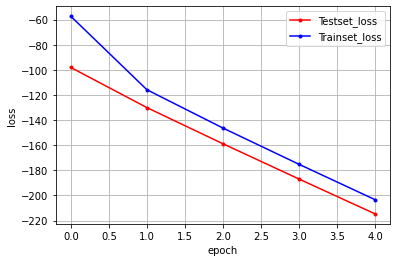

In [ ]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, v_loss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()